## Fire Incidents with Weather

In [5]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sbn
from scipy import stats

In [6]:
# Importing the cleaned/combined data from the csv with the years 2008-2018

firefile = './output/all_with_no_incident_nulls.csv'
df = pd.read_csv(firefile, skip_blank_lines=True, encoding='UTF-8')
len(df)


/Users/laura/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


159803

In [17]:
df['arrive_date_time'] = pd.to_datetime(df['arrive_date_time'])
df['cleared_date_time'] = pd.to_datetime(df['cleared_date_time'])
df['dispatch_date_time'] = pd.to_datetime(df['dispatch_date_time'])


In [9]:
# We were not able to get all the weather points because of API key issues and bad JSON formats
weather = './output/all_weather_data.csv'
dfw = pd.read_csv(weather, skip_blank_lines=True, encoding='UTF-8')
len(dfw)

3287

In [10]:
# Merging the weather data that we have in with the incident data
dfm = pd.merge(df, dfw, on='Date', how='right')

In [11]:
dfm.isna().sum()

OBJECTID                        59
address                         59
address2                     49640
apt_room                     51725
arrive_date_time             25965
cleared_date_time               61
dispatch_date_time              59
exposure                        59
incident_number                 59
incident_type                   59
incident_type_description       59
platoon                         59
station                         81
Longitude                       59
Latitude                        59
Year                            59
Date                            26
Unnamed: 0                       0
Max Temp (f)                    26
Min Temp (f)                    26
Humidity                        26
Precipitation                   26
Weather Conditions              26
Wind Speed                      26
Wind Gust                       26
dtype: int64

In [12]:
dfm.describe()
# We only have weather from 2010-2018

,OBJECTID,exposure,incident_type,station,Year,Unnamed: 0,Max Temp (f),Min Temp (f),Humidity,Precipitation,Wind Speed,Wind Gust
count,132044.000000,132044.00000,132044.000000,132022.000000,132044.000000,132103.000000,132077.000000,132077.000000,132077.000000,132077.000000,132077.000000,132077.000000
mean,573172.894331,0.00596,585.040025,12.715131,2014.176055,823.668024,71.158998,56.114335,72.279292,4.124156,7.285871,12.554116
std,54981.812169,0.16328,170.061036,7.850916,2.583375,481.741475,17.701969,17.564576,12.767920,10.611927,3.581787,5.062758
min,474769.000000,0.00000,100.000000,1.000000,2010.000000,0.000000,16.000000,1.000000,26.000000,0.000000,0.000000,3.000000
25%,523561.750000,0.00000,511.000000,6.000000,2012.000000,421.000000,58.000000,42.000000,64.000000,0.000000,5.000000,9.000000
50%,577454.500000,0.00000,611.000000,12.000000,2014.000000,816.000000,74.000000,58.000000,73.000000,0.200000,7.000000,12.000000
75%,618704.250000,0.00000,733.000000,19.000000,2016.000000,1212.000000,86.000000,72.000000,82.000000,3.800000,9.000000,15.000000
max,663561.000000,11.00000,9001.000000,29.000000,2018.000000,1825.000000,107.000000,94.000000,100.000000,157.700000,34.000000,43.000000


In [13]:
# First get rid of the ones where we have weather but no incidents and the null stations while we're at it
dfm = dfm.loc[dfm['station'].notnull()]
len(dfm)

132022

In [14]:
# Limit the incidents to fires
fires = dfm.loc[dfm['incident_type'] < 200,:]

In [15]:
fires['Month'] = pd.DatetimeIndex(fires['dispatch_date_time']).month

/Users/laura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
month_count = fires.groupby(['Year','Month'])
wdf = pd.DataFrame()
wdf['Incidents'] = month_count['Incident'].count()
wdf['Mean_Max_Temp'] = month_count['Max Temp (f)'].mean()
wdf['Mean_Min_Temp'] = month_count['Min Temp (f)'].mean()
wdf['Humidity'] = month_count['Humidity'].mean()
wdf['Max_Precip'] = month_count['Precipitation'].max()
wdf['Max_Wind_Speed'] = month_count['Wind Speed'].max()
# wdf['Max_Wind_Gust'] = month_count['Wind Gust'].max()
wdf


KeyError: 'Column not found: Incident'

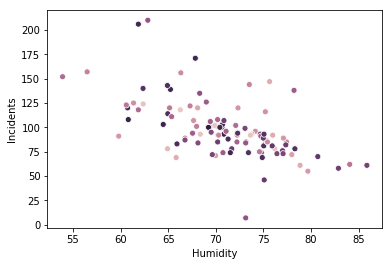

In [94]:
sbn.scatterplot(data=wdf, y = 'Incidents', x='Humidity', hue='Mean_Max_Temp', legend=False)
# plt.legend(loc='best')

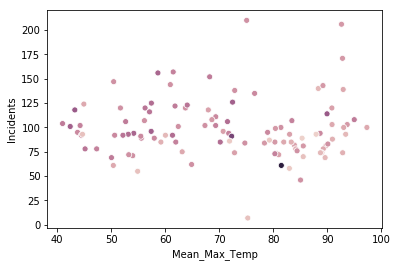

In [95]:
sbn.scatterplot(data=wdf, y = 'Incidents', x='Mean_Max_Temp', hue='Max_Wind_Speed', legend=False)
# plt.legend(loc='best')

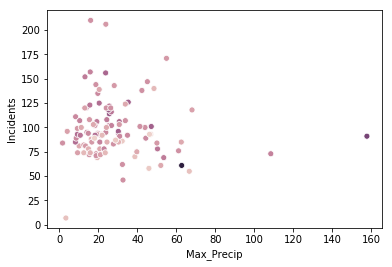

In [96]:
sbn.scatterplot(data=wdf, y = 'Incidents', x='Max_Precip', hue='Max_Wind_Speed', legend=False)
# plt.legend(loc='best')

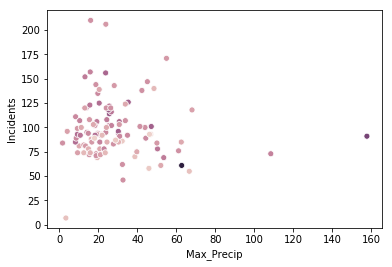

In [98]:
sbn.scatterplot(data=wdf, y = 'Incidents', x='Max_Precip', hue='Max_Wind_Speed', legend=False)
# plt.legend(loc='best')

In [110]:
storms = dfm.loc[dfm['incident_type'] >= 800,:]
storms['Month'] = pd.DatetimeIndex(storms['dispatch_date_time']).month
storms['Years'] = pd.DatetimeIndex(storms['dispatch_date_time']).year
month_count = storms.groupby(['Year'])

/Users/laura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/laura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [111]:
wdf = pd.DataFrame()
wdf['Incidents'] = month_count['Incident'].count()
wdf['Mean_Max_Temp'] = month_count['Max Temp (f)'].mean()
wdf['Mean_Min_Temp'] = month_count['Min Temp (f)'].mean()
wdf['Humidity'] = month_count['Humidity'].mean()
wdf['Max_Precip'] = month_count['Precipitation'].max()
wdf['Max_Wind_Speed'] = month_count['Wind Speed'].max()
wdf['Max_Wind_Gust'] = month_count['Wind Gust'].max()
wdf['Month'] = month_count['Month'].first()
wdf['Year'] = month_count['Years'].first()
wdf

,Incidents,Mean_Max_Temp,Mean_Min_Temp,Humidity,Max_Precip,Max_Wind_Speed,Max_Wind_Gust,Month,Year
Year,,,,,,,,,
2010.0,69,76.057971,59.347826,74.188406,26.9,18.0,27.0,2,2010
2011.0,81,76.098765,63.370370,73.913580,62.5,22.0,33.0,8,2011
2012.0,60,80.500000,65.833333,73.250000,18.8,17.0,29.0,4,2012
2013.0,46,78.521739,65.195652,77.173913,19.1,16.0,23.0,6,2013
2014.0,51,73.901961,59.764706,74.372549,26.7,16.0,23.0,6,2014
2015.0,40,75.050000,60.875000,71.575000,25.2,16.0,24.0,2,2015
2016.0,76,78.315789,65.394737,78.578947,157.7,26.0,42.0,1,2016
2017.0,51,73.235294,58.901961,71.039216,24.0,13.0,19.0,2,2017
2018.0,25,67.120000,53.680000,77.160000,62.7,34.0,43.0,2,2018


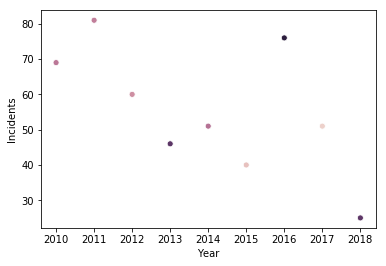

In [112]:
sbn.scatterplot(data=wdf, y = 'Incidents', x='Year', hue='Humidity', legend=False)
# plt.legend(loc='best')


In [104]:
sbn.scatterplot(data=wdf, y = 'Incidents', x='Month', legend=False)
# plt.legend(loc='best')


ValueError: Could not interpret input 'Month'